In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [17]:
#loading data
current_dir = os.getcwd()
data_folder = os.path.join(current_dir, 'data')
benin = pd.read_csv(os.path.join(data_folder, 'benin-malanville.csv'))

In [18]:
#checking the data
print(benin.head())
print(benin.info())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<class 'pandas.core.

In [19]:
# Summary Statics
# Calculate summary statistics for numeric columns
print(benin.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [20]:
def data_quality_check_and_adjust(df):    
    # Create a copy of the dataframe
    cleaned_df = df.copy()
    
    # 1. Basic data check
    print("\nInitial data shape:", cleaned_df.shape)
    
    # 2. Convert timestamp
    cleaned_df['Timestamp'] = pd.to_datetime(cleaned_df['Timestamp'])
    
    # 3. Check and handle missing values
    missing_before = cleaned_df.isnull().sum().sum()
    cleaned_df = cleaned_df.interpolate(method='linear')  # Fill missing values
    print(f"\nMissing values fixed: {missing_before - cleaned_df.isnull().sum().sum()}")
    
    # 4. Fix negative values in solar radiation
    solar_cols = ['GHI', 'DNI', 'DHI']
    for col in solar_cols:
        neg_count = (cleaned_df[col] < 0).sum()
        if neg_count > 0:
            cleaned_df.loc[cleaned_df[col] < 0, col] = 0
            print(f"Fixed {neg_count} negative values in {col}")
    
    # 5. Handle outliers in sensor and wind data
    sensor_cols = ['ModA', 'ModB', 'WS', 'WSgust']
    for col in sensor_cols:
        # Use 3 standard deviations as outlier threshold
        mean = cleaned_df[col].mean()
        std = cleaned_df[col].std()
        outliers = (cleaned_df[col] > mean + 3*std) | (cleaned_df[col] < mean - 3*std)
        if outliers.sum() > 0:
            cleaned_df.loc[outliers, col] = mean
            print(f"Fixed {outliers.sum()} outliers in {col}")
    
    # 6. Ensure wind gust speed is not less than wind speed
    invalid_gusts = (cleaned_df['WSgust'] < cleaned_df['WS']).sum()
    if invalid_gusts > 0:
        cleaned_df.loc[cleaned_df['WSgust'] < cleaned_df['WS'], 'WSgust'] = cleaned_df['WS']
        print(f"Fixed {invalid_gusts} invalid gust speeds")
    
    print("\nData quality check and adjustment completed.")
    print("Final data shape:", cleaned_df.shape)
    
    return cleaned_df

data_quality_check_and_adjust(benin)
print(benin.head())

Starting Data Quality Check and Adjustment...

Initial data shape: (525600, 19)

Missing values fixed: 0
Fixed 258847 negative values in GHI
Fixed 275987 negative values in DNI
Fixed 259182 negative values in DHI
Fixed 27 outliers in ModA
Fixed 63 outliers in ModB
Fixed 3109 outliers in WS
Fixed 3500 outliers in WSgust
Fixed 828 invalid gust speeds

Data quality check and adjustment completed.
Final data shape: (525600, 19)
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0      

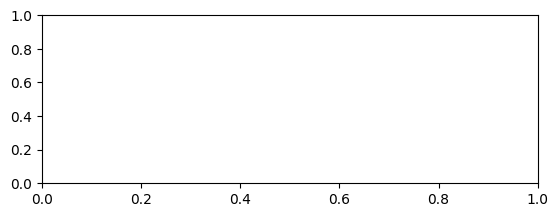

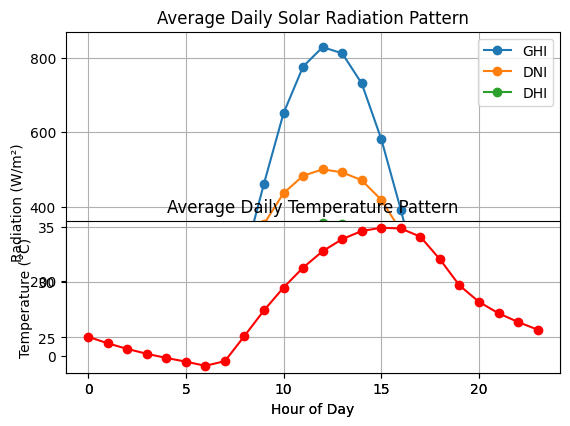

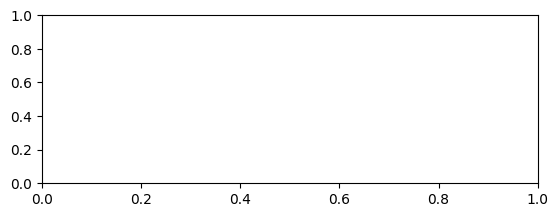

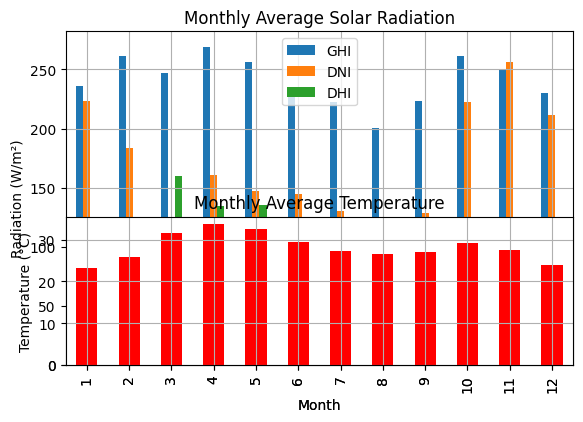

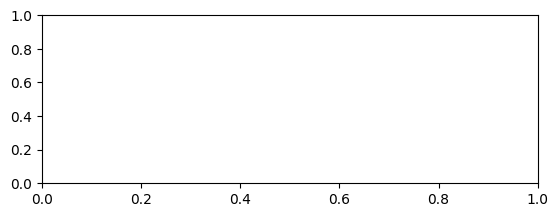

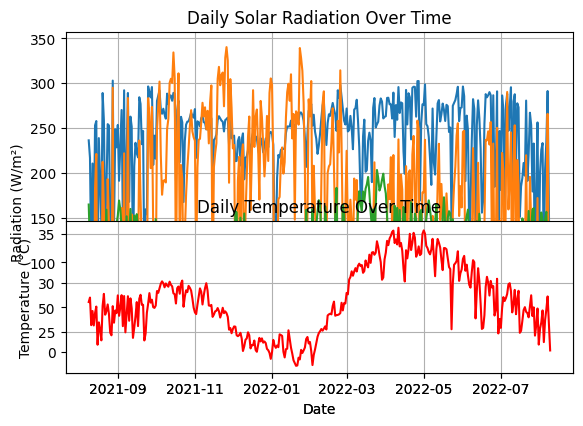


Summary Statistics:

Daily Peaks (Average by hour):
Peak GHI hour: 12:00, Value: 828.21 W/m²
Peak DNI hour: 12:00, Value: 500.17 W/m²
Peak temperature hour: 15:00, Value: 34.93°C

Monthly Patterns:
Highest radiation month: 4, Value: 268.76 W/m²
Highest temperature month: 4, Value: 33.77°C


In [32]:
def solar_time_series_analysis(df):
    # Ensure timestamp is in datetime format
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Add time components
    df['Month'] = df['Timestamp'].dt.month
    df['Hour'] = df['Timestamp'].dt.hour
    df['Date'] = df['Timestamp'].dt.date

    # 1. Daily Patterns Plot
    daily_avg = df.groupby('Hour').agg({
        'GHI': 'mean',
        'DNI': 'mean',
        'DHI': 'mean',
        'Tamb': 'mean'
    })

    plt.subplot(2, 1, 1)
    daily_avg[['GHI', 'DNI', 'DHI']].plot(style='-', marker='o')
    plt.title('Average Daily Solar Radiation Pattern')
    plt.xlabel('Hour of Day')
    plt.ylabel('Radiation (W/m²)')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    daily_avg['Tamb'].plot(style='-', marker='o', color='red')
    plt.title('Average Daily Temperature Pattern')
    plt.xlabel('Hour of Day')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2. Monthly Patterns Plot
    monthly_avg = df.groupby('Month').agg({
        'GHI': 'mean',
        'DNI': 'mean',
        'DHI': 'mean',
        'Tamb': 'mean'
    })

    plt.subplot(2, 1, 1)
    monthly_avg[['GHI', 'DNI', 'DHI']].plot(kind='bar')
    plt.title('Monthly Average Solar Radiation')
    plt.xlabel('Month')
    plt.ylabel('Radiation (W/m²)')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    monthly_avg['Tamb'].plot(kind='bar', color='red')
    plt.title('Monthly Average Temperature')
    plt.xlabel('Month')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 3. Time Series Plot (Full Period)
 
    daily_values = df.groupby('Date').agg({
        'GHI': 'mean',
        'DNI': 'mean',
        'DHI': 'mean',
        'Tamb': 'mean'
    })

    plt.subplot(2, 1, 1)
    daily_values[['GHI', 'DNI', 'DHI']].plot()
    plt.title('Daily Solar Radiation Over Time')
    plt.xlabel('Date')
    plt.ylabel('Radiation (W/m²)')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    daily_values['Tamb'].plot(color='red')
    plt.title('Daily Temperature Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 4. Print Summary Statistics
    print("\nSummary Statistics:")
    print("\nDaily Peaks (Average by hour):")
    print(f"Peak GHI hour: {daily_avg['GHI'].idxmax()}:00, Value: {daily_avg['GHI'].max():.2f} W/m²")
    print(f"Peak DNI hour: {daily_avg['DNI'].idxmax()}:00, Value: {daily_avg['DNI'].max():.2f} W/m²")
    print(f"Peak temperature hour: {daily_avg['Tamb'].idxmax()}:00, Value: {daily_avg['Tamb'].max():.2f}°C")

    print("\nMonthly Patterns:")
    print(f"Highest radiation month: {monthly_avg['GHI'].idxmax()}, Value: {monthly_avg['GHI'].max():.2f} W/m²")
    print(f"Highest temperature month: {monthly_avg['Tamb'].idxmax()}, Value: {monthly_avg['Tamb'].max():.2f}°C")

solar_time_series_analysis(benin)


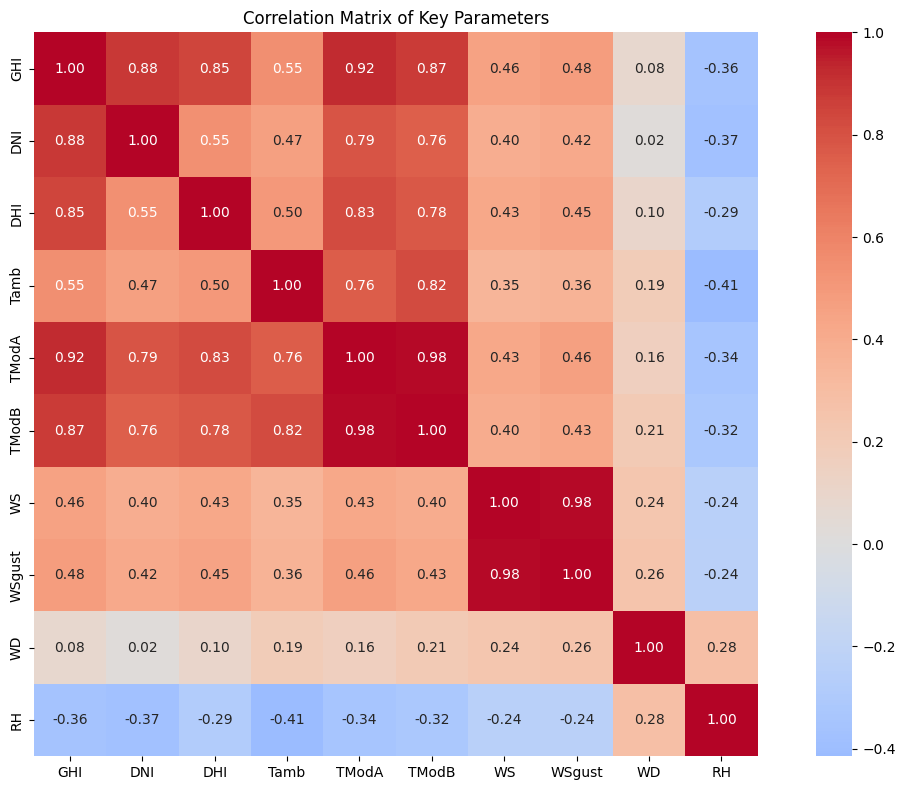

In [28]:
def perform_correlation_analysis(df):   
    # Select relevant columns for correlation
    cols_to_correlate = ['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB', 
                        'WS', 'WSgust', 'WD', 'RH']
    
    # Create correlation matrix
    corr_matrix = df[cols_to_correlate].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                fmt='.2f', square=True)
    plt.title('Correlation Matrix of Key Parameters')
    plt.tight_layout()
    plt.show()
perform_correlation_analysis(benin)
